## Inspect CNN

NB to inspect events where CNN fails

In [1]:
%matplotlib inline 
#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import random            as random
import numpy             as np
import pandas            as pd
#import tables            as tb
import matplotlib.pyplot as plt
import os 

In [3]:
import xyimg.dataprep as dp
import xyimg.cnn      as cnn
import xyimg.utils    as ut

In [4]:
ipath  = os.environ['LPRDATADIR']+'CNN/'


filenames = ('5bar_h0s0w10_HCNN_xy_E_sum+yz_E_sum+zx_E_sum_f8e20F100_CrossEntropyLoss.npz',
             '5bar_h0s0w10_HCNN_xy_E_sum_f8e20F100_CrossEntropyLoss.npz',
             '5bar_h0s0w10_HCNN_xy_E_sum+yz_E_sum+zx_E_sum_f8e20_CrossEntropyLoss.npz',
             '5bar_h0s0w10_HCNN_xy_E_sum_f8e20_CrossEntropyLoss.npz',
             '5bar_h0s0w10_HCNN_xy_E_sum+yz_E_sum+zx_E_sum_f8e20B_CrossEntropyLoss.npz',
             '5bar_h0s0w10_HCNN_xy_E_sum_f8e20B_CrossEntropyLoss.npz')

labels   = ('e3F100', 'e1F100', 'e3', 'e1', 'e3B', 'e1B')

sfilenames = ('5bar_h0s0w10_HCNN_xy_segclass_max+yz_segclass_max+zx_segclass_max_f8e20_CrossEntropyLoss.npz',
              '5bar_h0s0w10_HCNN_xy_segclass_max_f8e20_CrossEntropyLoss.npz',
              '5bar_h0s0w10_HCNN_xy_segclass_max+yz_segclass_max+zx_segclass_max_f8e20B_CrossEntropyLoss.npz',
              '5bar_h0s0w10_HCNN_xy_segclass_max_f8e20B_CrossEntropyLoss.npz')

slabels = ('s3', 's1', 's3B', 's1B')

zfilenames = ('5bar_h0s0w10_HCNN_xy_E_sum+yz_E_sum+zx_E_sum_f8e20_CrossEntropyLoss.npz',
             '5bar_h0s0w10_HCNN_xy_E_sum_f8e20_CrossEntropyLoss.npz',
             '5bar_h0s0w10_HCNN_xy_E_sum+xy_z_mean+yz_E_sum+yz_x_mean+zx_E_sum+zx_y_mean_f8e20_CrossEntropyLoss.npz',
             '5bar_h0s0w10_HCNN_xy_E_sum+xy_z_mean_f8e20_CrossEntropyLoss.npz')

zlabels = ('e3', 'e1', 'e3z3', 'e1z1') 


dfilenames = ('5bar_h0s0w10_HCNN_xy_E_sum+yz_E_sum+zx_E_sum_f8e20_CrossEntropyLoss.npz',
              '5bar_h2s10w10_HCNN_xy_E_sum+yz_E_sum+zx_E_sum_f8e20_CrossEntropyLoss.npz')

dlabels = ('h0s0', 'h2s10') 

## RoC esum widths

In [5]:
def ind_rocs(filenames, labels):
    for ifile, label in zip(filenames, labels):
        cres = np.load(ipath + ifile)
        cnn.plot_roc(cres['y'], cres['yp']); plt.title(label)
    return

In [6]:
def rocs(files, labels, title = '', rejection = 0.):
    ydir, ypdir  = {}, {}
    plt.figure()
    for ifile, label in zip(files, labels):
        cnndata      = np.load(ipath + ifile)
        ydir [label] = cnndata['y'] 
        ypdir[label] = cnndata['yp']
        y, yp  = ydir[label], ypdir[label]
        yr, ys = cnn.roc_vals(y, yp)
        #eff    = cnn.roc_value(y, yp, rejection)
        #print(f"{label} efficiency {eff} at {rejection} rejection")
        plt.plot(yr, ys, label = label, lw = 2, alpha = .8)
        plt.xlim((rejection, 1.))
        plt.legend()
    plt.grid()
    plt.xlabel('rejection'); plt.ylabel('efficiency');
    plt.title(title);
    sname   = ut.str_concatenate(('img/roc_', title), '_') + '.png'
    print('save figure at ', sname)
    plt.savefig(sname)

## Segclass failures

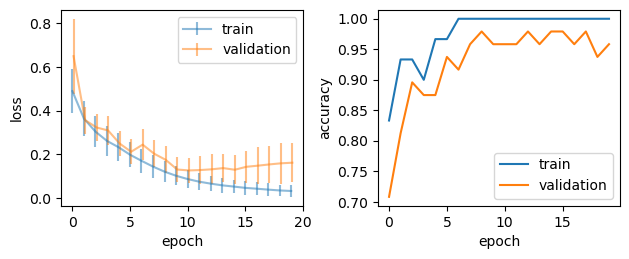

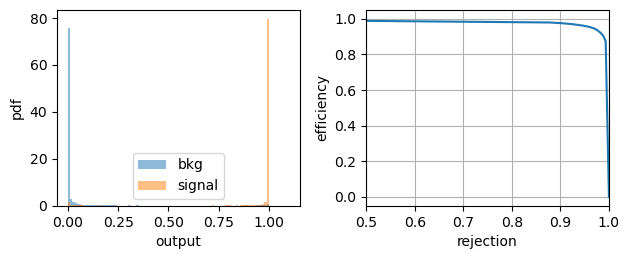

In [9]:
ifile = '5bar_h0s0w10_HCNN_xy_segclass_max+yz_segclass_max+zx_segclass_max_f8e20_CrossEntropyLoss.npz'
rcnn = np.load(ipath + ifile)
cnn.plot_epochs(rcnn['losses'], rcnn['accuracies'])
cnn.plot_roc(rcnn['y'], rcnn['yp'])


In [10]:
datafname = "/scratch/next/data/NEXT100/pressure_topology/shots/5bar_shuffle_h0mm_s0mm_w10mm.npz"
labels    = ['xy_segclass_max', 'yz_segclass_max', 'zx_segclass_max', 'xy_ext_max', 'yz_ext_max', 'zx_ext_max']
idata     = cnn.GoDataset(datafname, labels = labels)

In [75]:
indices   = cnn.false_positives_indices(rcnn['y'], rcnn['yp'], 0.95, rcnn['index'][0])
nfalses  = len(indices)
ntotal   = rcnn['index'][1] - rcnn['index'][0] +1
print('false positives fraction {:4.2f} %'.format(100.*float(nfalses/ntotal)))

false positives fraction 0.64 %


In [79]:
indices   = cnn.false_negatives_indices(rcnn['y'], rcnn['yp'], 0.05, rcnn['index'][0])
nfalses  = len(indices)
ntotal   = rcnn['index'][1] - rcnn['index'][0] +1
print('false negatives fraction {:4.2f} %'.format(100.*float(nfalses/ntotal)))

false negatives fraction 1.20 %


In [80]:
index0 = rcnn['index'][0]
indexi = 0

y  1
y   1
yp  0.00029711542


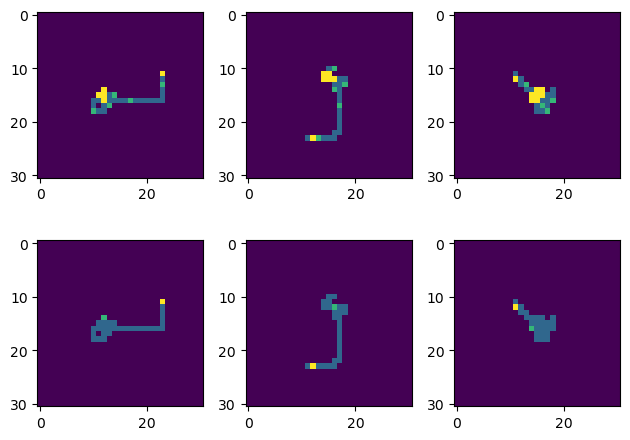

In [96]:
index  = indices[indexi]
y, x = idata.y[index], idata.x[index]
print('y ', y)
print('y  ', rcnn['y'] [index - index0])
print('yp ', rcnn['yp'][index - index0])
plt.figure()
plt.subplot(2, 3, 1); plt.imshow(x[0])
plt.subplot(2, 3, 2); plt.imshow(x[1])
plt.subplot(2, 3, 3); plt.imshow(x[2])
plt.subplot(2, 3, 4); plt.imshow(x[3])
plt.subplot(2, 3, 5); plt.imshow(x[4])
plt.subplot(2, 3, 6); plt.imshow(x[5])
plt.tight_layout()
indexi += 1

## Black

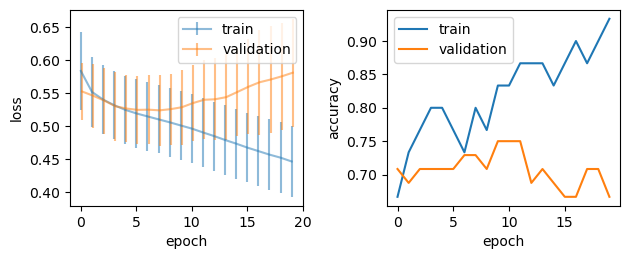

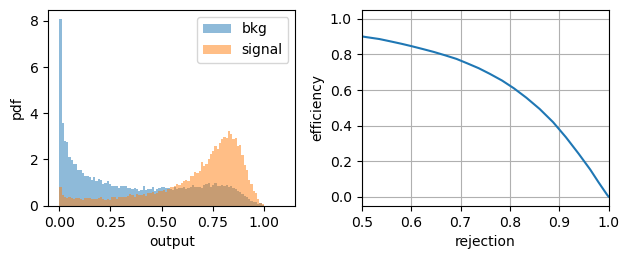

In [97]:
ifile = '5bar_h0s0w10_HCNN_xy_E_sum_f8e20B_CrossEntropyLoss.npz'
rcnn = np.load(ifile)
cnn.plot_epochs(rcnn['losses'], rcnn['accuracies'])
cnn.plot_roc(rcnn['y'], rcnn['yp'])

In [99]:
datafname = "/scratch/next/data/NEXT100/pressure_topology/shots/5bar_shuffle_h0mm_s0mm_w10mm.npz"
labels    = ['xy_E_sum']
idata     = cnn.GoDataset(datafname, labels = labels)

In [100]:
indices   = cnn.false_positives_indices(rcnn['y'], rcnn['yp'], 0.95, rcnn['index'][0])
nfalses  = len(indices)
ntotal   = rcnn['index'][1] - rcnn['index'][0] +1
print('false positives fraction {:4.2f} %'.format(100.*float(nfalses/ntotal)))

false positives fraction 0.25 %


In [101]:
index0 = rcnn['index'][0]
indexi = 0


y  0
y   0
yp  0.9525773


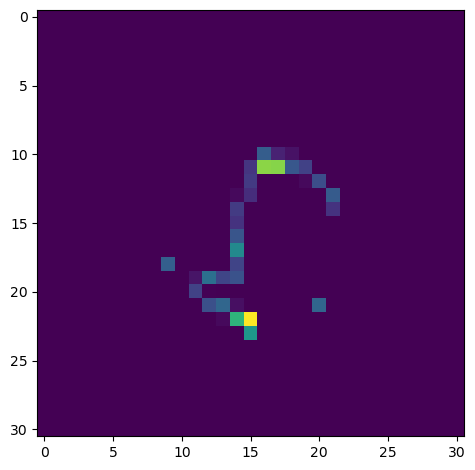

In [106]:
index  = indices[indexi]
y, x = idata.y[index], idata.x[index]
print('y ', y)
print('y  ', rcnn['y'] [index - index0])
print('yp ', rcnn['yp'][index - index0])
plt.figure()
plt.subplot(1, 1, 1); plt.imshow(x[0])
plt.tight_layout()
indexi += 1

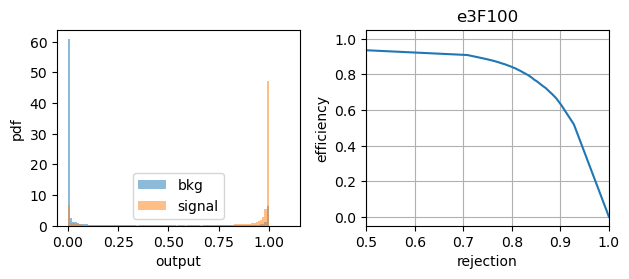

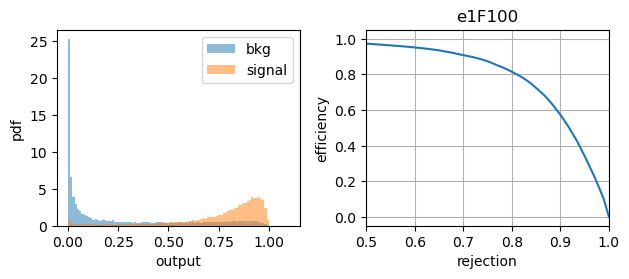

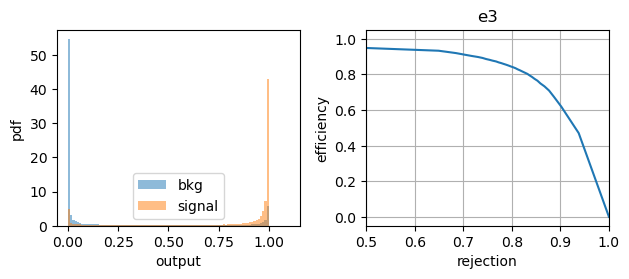

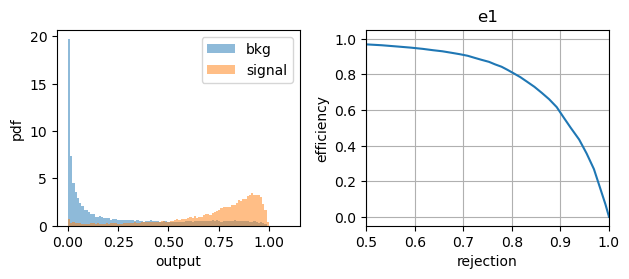

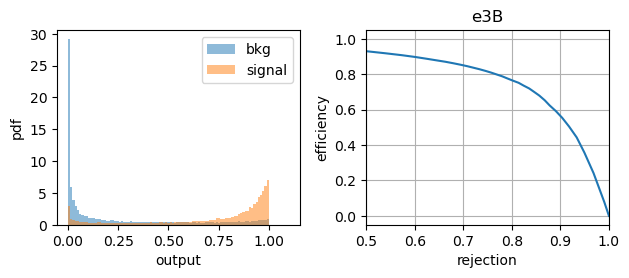

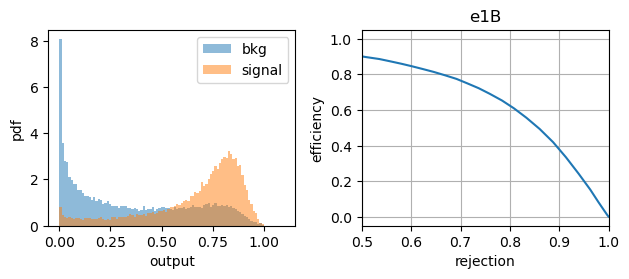

In [33]:
ind_rocs(filenames, labels)

save figure at  img/roc__.png


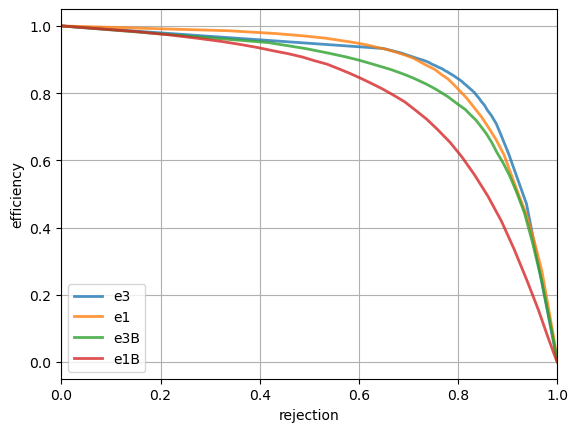

In [34]:
rocs(filenames[2:], labels[2:])

save figure at  img/roc__.png


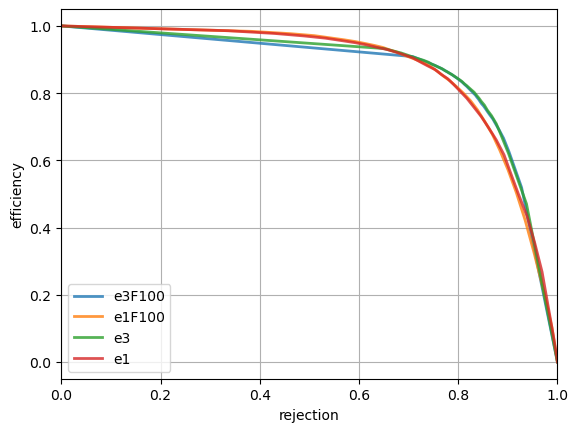

In [35]:
rocs(filenames[:4], labels[:4])

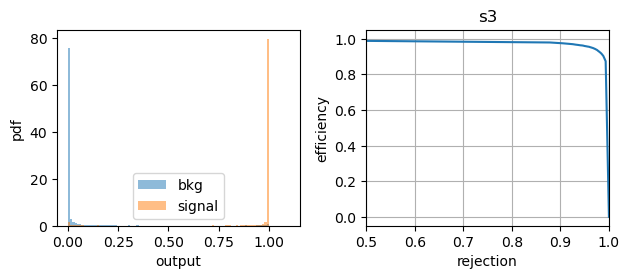

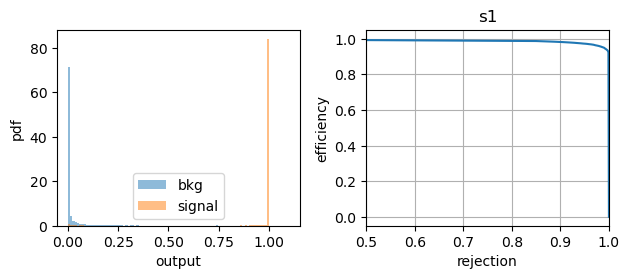

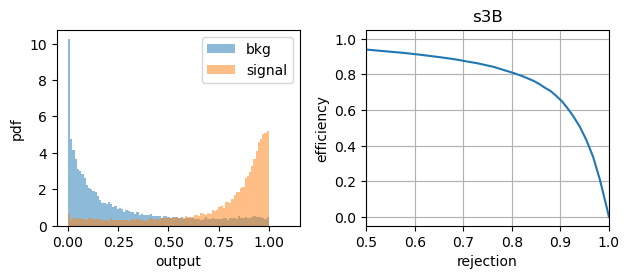

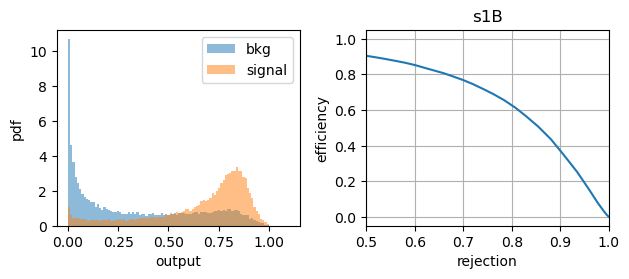

In [39]:
ind_rocs(sfilenames, slabels)

save figure at  img/roc__.png


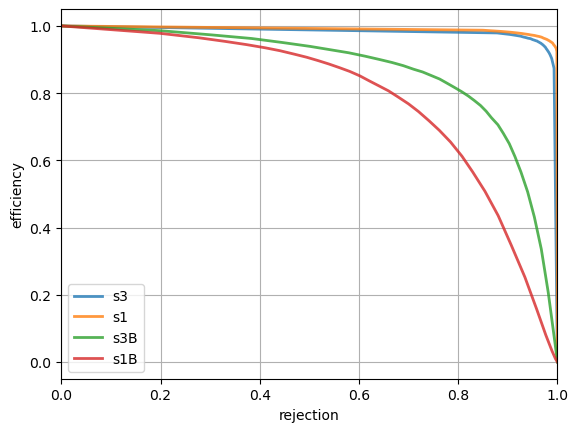

In [40]:
rocs(sfilenames, slabels)

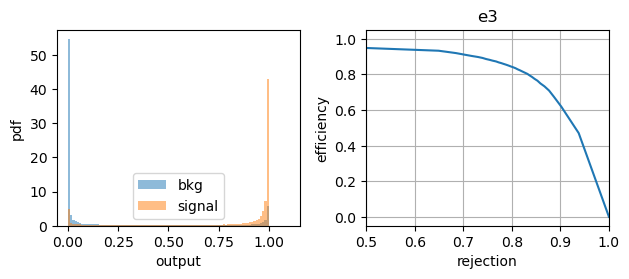

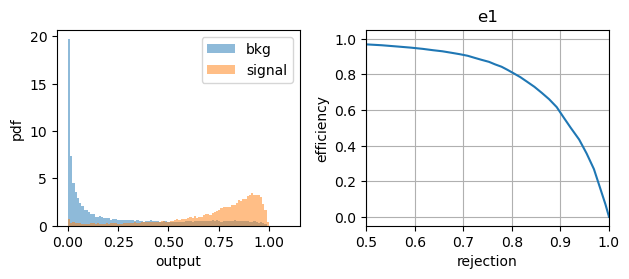

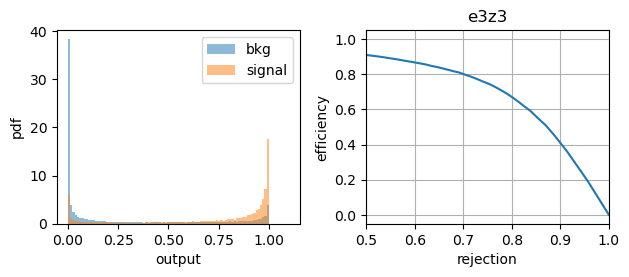

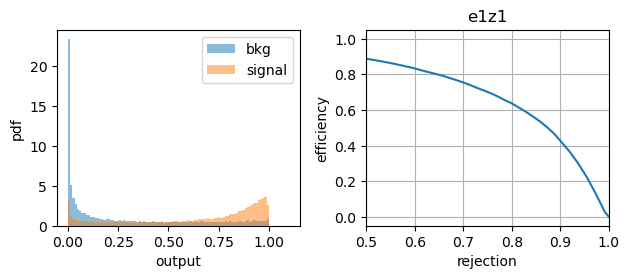

In [44]:
ind_rocs(zfilenames, zlabels)

save figure at  img/roc__.png


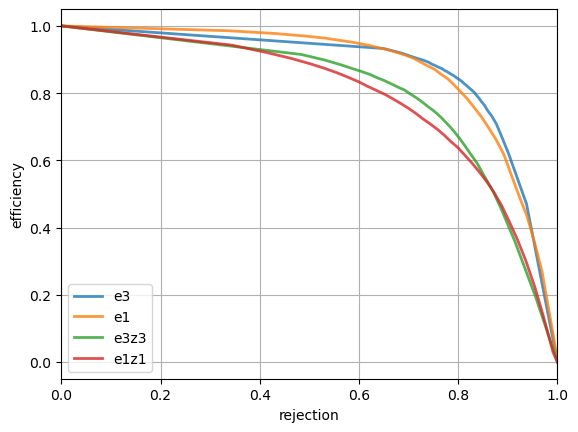

In [45]:
rocs(zfilenames, zlabels)

## RoC colors

In [36]:
def roc_colors(pressure, widths, colors, rejection = 0.9):
    ydir, ypdir  = {}, {}
    plt.figure()
    for labels in colors:
        _ , ifile   = cnn.get_cnn_filenames(pressure, projection, widths, labels)
        cnndata     = np.load(ipath + ifile)
        name        = dp.str_concatenate(labels, '+')
        ydir[name]  = cnndata['y'] .flatten()
        ypdir[name] = cnndata['yp'].flatten()
        yr, ys = cnn.roc_vals(ydir[name], ypdir[name])
        plt.plot(yr, ys, label = name, lw = 2)
        plt.xlim((rejection, 1.))
        plt.legend()
    plt.grid()
    plt.xlabel('rejection'); plt.ylabel('efficiency');
    plt.title(pressure);
    swidths = dp.str_concatenate(widths, 'x')
    sname   = dp.str_concatenate(('img/roc_colors_', pressure, swidths), '_') + '.png'
    print('save figure at ', sname)
    plt.savefig(sname)


save figure at  img/roc_colors__13bar_10x10.png


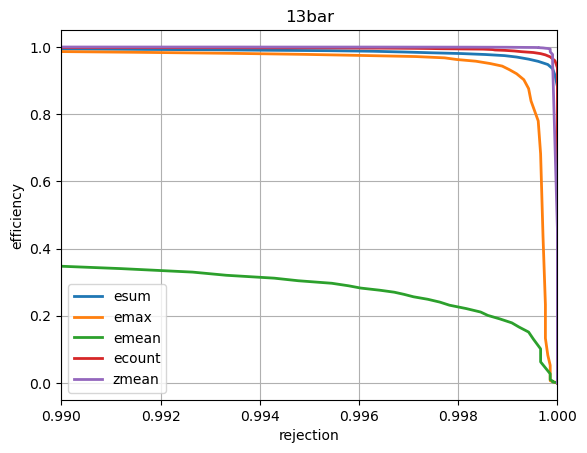

In [37]:
pressure = '13bar'
colors   = [['esum'], ['emax'], ['emean'], ['ecount'], ['zmean']]
widths   = (10, 10)
roc_colors(pressure, widths, colors, 0.99)

## Ana Test and Seg Images

In [53]:
def roc_test(pressures, widths, labels, rejection = 0.9):
    ydir, ypdir  = {}, {}
    plt.figure()
    for pressure in pressures:
        _ , ifile   = cnn.get_cnn_filenames(pressure, projection, widths, labels)
        cnndata     = np.load(ipath + ifile)
        name        = pressure
        ydir[name]  = cnndata['y'] .flatten()
        ypdir[name] = cnndata['yp'].flatten()
        yr, ys = cnn.roc_vals(ydir[name], ypdir[name])
        plt.plot(yr, ys, label = name, lw = 2, alpha = 0.8)
        plt.xlim((rejection, 1.))
        plt.legend()
    plt.grid()
    plt.xlabel('rejection'); plt.ylabel('efficiency');
    slabels = dp.str_concatenate(labels, '+')
    swidths = dp.str_concatenate(widths, 'x')
    title   = dp.str_concatenate((swidths, slabels), '_')
    plt.title(title);
    sname   = dp.str_concatenate(('img/roc_test_', title), '_') + '.png'
    print('save figure at ', sname)
    plt.savefig(sname)


save figure at  img/roc_test__10x10_seg.png


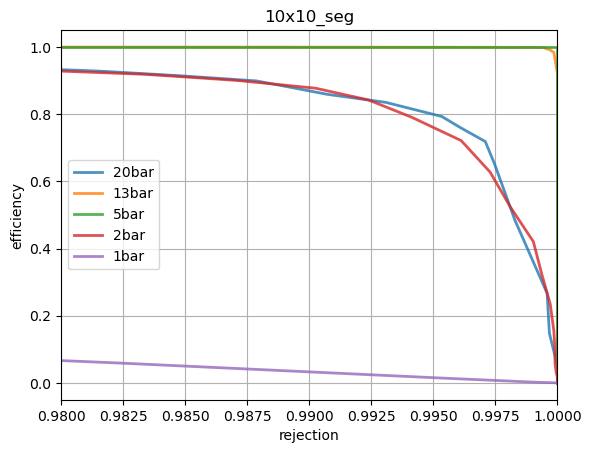

In [54]:
pressures = ('20bar', '13bar', '5bar', '2bar', '1bar')
widths    = (10, 10)
labels    = ['seg']
roc_test(pressures, widths, labels, 0.98)

save figure at  img/roc_test__10x10_test.png


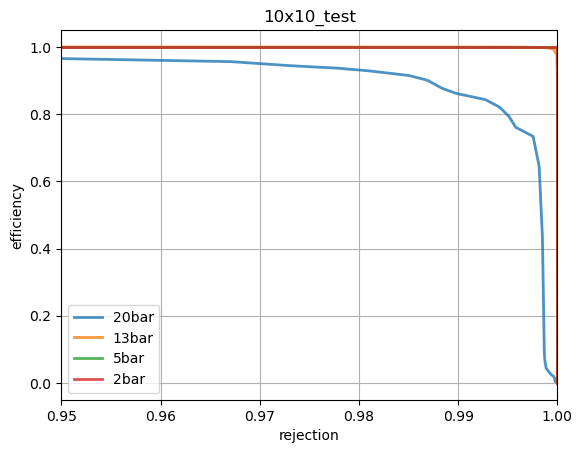

In [56]:
pressures = ('20bar', '13bar', '5bar', '2bar')
widths    = (10, 10)
labels    = ['test']
roc_test(pressures, widths, labels, 0.95)